In [1]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L


In [2]:
cd /blue/adamginsburg/adamginsburg/almaimf/workdir/

/blue/adamginsburg/adamginsburg/almaimf/workdir


In [3]:
from spectral_cube import SpectralCube

In [4]:
from astropy import visualization as vis

In [5]:
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'

In [6]:
import casatasks

In [7]:
from casatasks import applycal, clearcal

In [8]:
from casatasks import split

In [9]:
from casatasks import tclean

In [10]:
from casatasks import casalog

In [11]:
casalog.logfile()

'/blue/adamginsburg/adamginsburg/almaimf/workdir/casa-20220301-181534.log'

In [12]:
import json

In [13]:
with open('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/metadata.json', 'r') as fh:
    metadata = json.load(fh)

metadata['B6']['G327.29']

In [14]:
import glob

In [15]:
caltables = glob.glob('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/continuum_calibration_files/G327.29_B6*merged_12M_*cal')
caltables

['/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/continuum_calibration_files/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase5_5s.cal',
 '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/continuum_calibration_files/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase3_20s.cal',
 '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/continuum_calibration_files/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase4_10s.cal',
 '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/continuum_calibration_files/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase2_60s.cal',
 '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/continuum_calibration_files/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase1_inf.cal']

In [16]:
import shutil

In [17]:
for fn in caltables:
    if not os.path.exists(os.path.basename(fn)):
        shutil.copytree(fn, os.path.basename(fn))

In [18]:
caltables = sorted([os.path.basename(ct) for ct in caltables])

In [19]:
vis_orange = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X171/group.uid___A001_X1296_X172/member.uid___A001_X1296_X173/calibrated/G327.29_B6_spw0_12M.concat.ms'

ls -lhrt /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X171/group.uid___A001_X1296_X172/member.uid___A001_X1296_X173/calibrated

In [20]:
vis_blue = os.path.basename(vis_orange)

In [21]:
if not os.path.exists(vis_blue):
    shutil.copytree(vis_orange, vis_blue)

In [22]:
vis_blue, caltables

('G327.29_B6_spw0_12M.concat.ms',
 ['G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase1_inf.cal',
  'G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase2_60s.cal',
  'G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase3_20s.cal',
  'G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase4_10s.cal',
  'G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase5_5s.cal'])

In [23]:
vis, vis_blue

(<module 'astropy.visualization' from '/orange/adamginsburg/miniconda3/envs/python38/lib/python3.8/site-packages/astropy/visualization/__init__.py'>,
 'G327.29_B6_spw0_12M.concat.ms')

In [24]:
%run /orange/adamginsburg/ALMA_IMF/reduction/misc/applycal_tests.py

In [25]:
spwmap = get_spw_map(vis_blue, caltables)
spwmap

[[16, 16], [16, 16], [16, 16], [16, 16], [16, 16]]

In [26]:
%run /orange/adamginsburg/ALMA_IMF/reduction/reduction/selfcal_heuristics.py

In [27]:
fields = [",".join(["{0}".format(x) for x in goodenough_field_solutions(ct)[0]]) for ct in caltables]
fields

['0,23,27,28,29,32,33,34,37,38,39,43,44',
 '0,23,27,28,29,32,33,34,37,38,39,43,44',
 '0,27,28,29,32,33,34,37,38,39,40,43,44',
 '0,27,28,29,32,33,34,37,38,39,40,43,44',
 '0,27,28,29,32,33,34,37,38,39,44']

In [28]:
clearcal(vis=vis_blue)

In [29]:
#fields = ['0']*5 # see what happens if we don't use the 'satellite' fields
applycal(vis=vis_blue, gaintable=caltables, spwmap=spwmap, gainfield=fields, interp=['linearpd,linearpd']*len(fields), calwt=[False]*len(fields), applymode='calonly')

In [30]:
default_kwargs = dict(imsize=[1440, 1080], cell=['0.12arcsec', '0.12arcsec'], phasecenter='ICRS 238.28387499997285deg -54.61905515337784deg',
                      threshold='700mJy',
                             nchan=1,
        start=1100,
                             stokes="I",projection="SIN",startmodel="",specmode="cube",reffreq="",
        width="",outframe="LSRK",veltype="radio",
        restfreq=[],interpolation="linear",
        perchanweightdensity=True,
        gridder="mosaic",facets=1,
        psfphasecenter="",wprojplanes=1,vptable="",mosweight=True,
        aterm=True,psterm=False,wbawp=True,conjbeams=False,cfcache="",
        usepointing=False,computepastep=360.0,rotatepastep=360.0,pointingoffsetsigdev=0.0,pblimit=0.05,
        normtype="flatnoise",
                      deconvolver="multiscale",scales=[0, 5,],
                      nterms=2,smallscalebias=0.0,
        restoration=True,restoringbeam="",pbcor=False,outlierfile="",weighting="briggs",
        robust=0,noise="1.0Jy",npixels=0,uvtaper=[],
        gain=0.1,nsigma=0.0,cycleniter=-1,cyclefactor=1.0,
        minpsffraction=0.05,maxpsffraction=0.8,interactive=False,
                      usemask="pb",mask="",
                      pbmask=0.2,
                      sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,
        smoothfactor=1.0,minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,
        minpercentchange=-1.0,verbose=False,fastnoise=True,restart=True,savemodel="none",
        calcres=True,calcpsf=True,parallel=False,
                      selectdata=True,field=['G327.29'],spw="",timerange="",
        uvrange="",antenna="",scan="",observation="",intent="",)

In [31]:
imname = "G327.29_B6_spw0_12M_spw0_testchannel_selfcal"
os.system(f'rm -r {imname}.*')
tclean(vis=vis_blue,
        datacolumn="corrected",
        imagename=imname,
               niter=0,

 **default_kwargs)

{}

In [32]:
imname = "G327.29_B6_spw0_12M_spw0_testchannel_noselfcal"
os.system(f'rm -r {imname}.*')
tclean(vis=vis_blue,
        datacolumn="data",
        imagename=imname,
               niter=0,

 **default_kwargs)

{}

In [33]:
ls -lhrtd G327*/

drwxr-xr-x  7 adamginsburg adamginsburg 4.0K Aug  1  2021 G327.29_B3_uid___A001_X1296_X17d_continuum_merged_12M_phase2_60s.cal//
drwxr-xr-x  7 adamginsburg adamginsburg 4.0K Aug  1  2021 G327.29_B3_uid___A001_X1296_X17d_continuum_merged_12M_phase1_inf.cal//
drwxr-xr-x  7 adamginsburg adamginsburg 4.0K Aug  1  2021 G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase4_10s.cal//
drwxr-xr-x  7 adamginsburg adamginsburg 4.0K Aug  1  2021 G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase2_60s.cal//
drwxr-xr-x  7 adamginsburg adamginsburg 4.0K Aug  1  2021 G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase1_inf.cal//
drwxr-xr-x  7 adamginsburg adamginsburg 4.0K Aug  1  2021 G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase5_5s.cal//
drwxr-xr-x  7 adamginsburg adamginsburg 4.0K Aug  1  2021 G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_phase3_20s.cal//
drwxr-xr-x 28 adamginsburg adamginsburg 4.0K Feb  4 09:48 G327.29_B6_spw7_12M.concat.ms.contsub//


/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


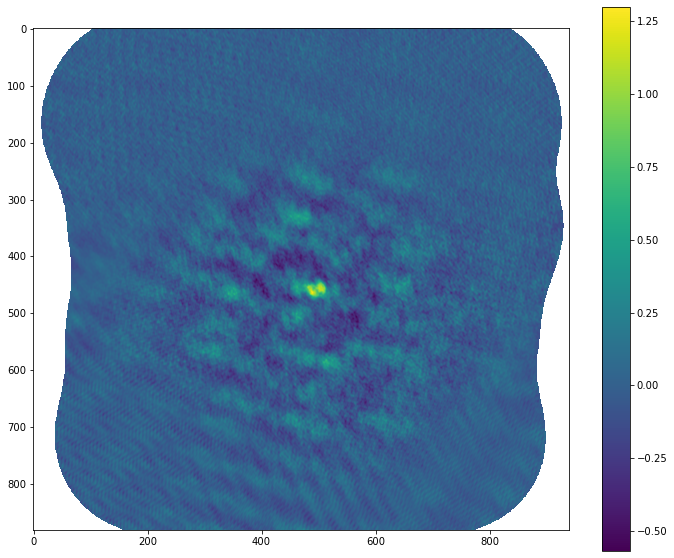

In [34]:
pl.figure(figsize=(12,10))
nsc = SpectralCube.read('G327.29_B6_spw0_12M_spw0_testchannel_noselfcal.residual', format='casa_image')[:,100:-100,250:-250][0]
nsc.quicklook()
pl.colorbar()

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


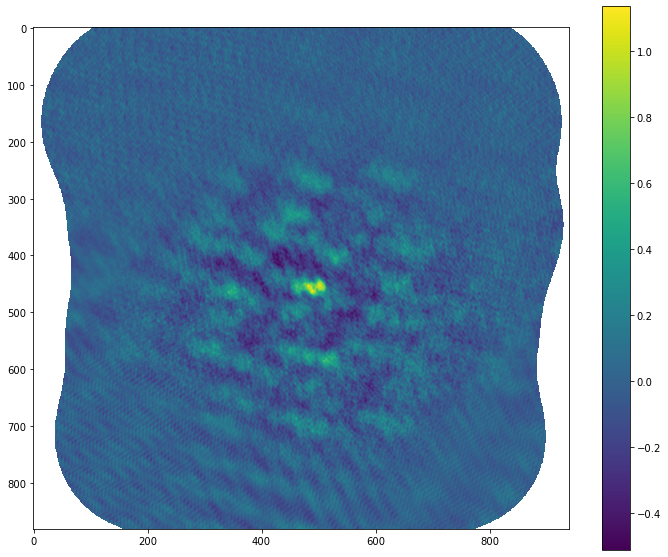

In [35]:
pl.figure(figsize=(12,10))
sc = SpectralCube.read('G327.29_B6_spw0_12M_spw0_testchannel_selfcal.residual', format='casa_image')[:,100:-100,250:-250][0]
sc.quicklook()
pl.colorbar()

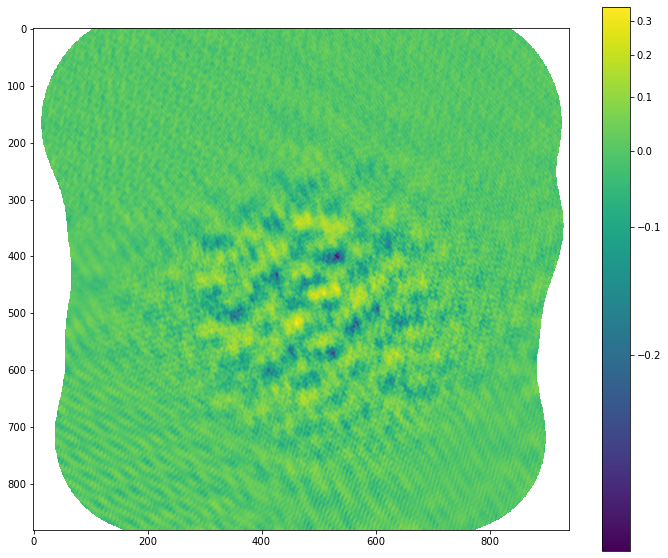

In [36]:
pl.figure(figsize=(12,10))
vis.imshow_norm((nsc-sc).value, stretch=vis.AsinhStretch())
pl.colorbar()

In [37]:
imname = "G327.29_B6_spw0_12M_spw0_testchannel_selfcal_clean"
os.system(f'rm -r {imname}.*')
tclean(vis=vis_blue,
        datacolumn="corrected",
        imagename=imname,
       niter=5000,
       **default_kwargs
)

{}

In [38]:
imname = "G327.29_B6_spw0_12M_spw0_testchannel_noselfcal_clean"
os.system(f'rm -r {imname}.*')
tclean(vis=vis_blue,
        datacolumn="data",
        imagename=imname,
       niter=5000,
       **default_kwargs
)

{}

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


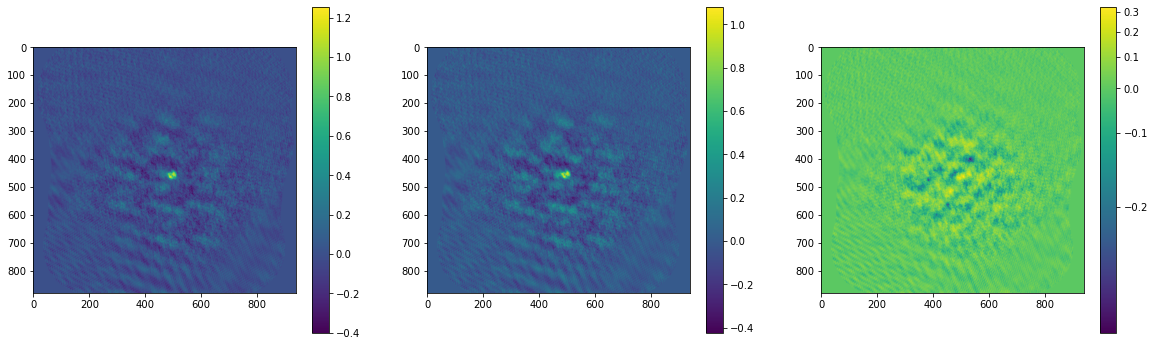

In [39]:
pl.figure(figsize=(20,6))
pl.subplot(1,3,1)
nsc = SpectralCube.read('G327.29_B6_spw0_12M_spw0_testchannel_noselfcal_clean.image', format='casa_image')[:,100:-100,250:-250][0]
nsc.quicklook()
pl.colorbar()

pl.subplot(1,3,2)
sc = SpectralCube.read('G327.29_B6_spw0_12M_spw0_testchannel_selfcal_clean.image', format='casa_image')[:,100:-100,250:-250][0]
sc.quicklook()
pl.colorbar()

pl.subplot(1,3,3)
vis.imshow_norm((nsc-sc).value, stretch=vis.AsinhStretch())
pl.colorbar()

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


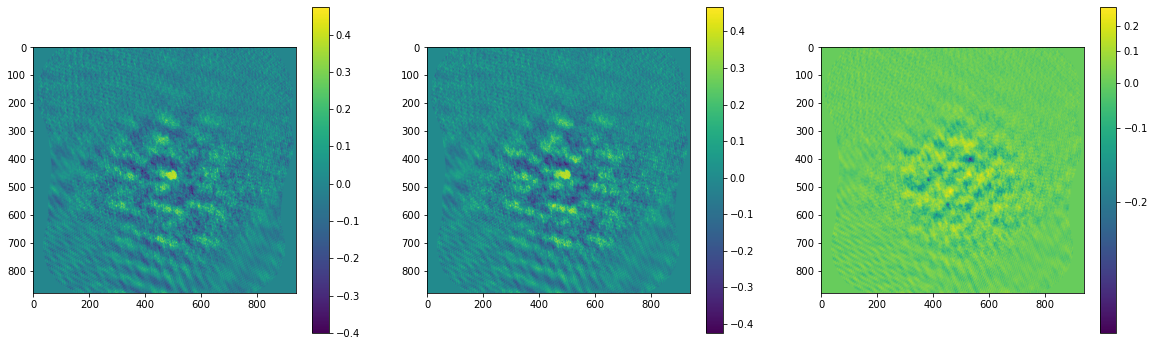

In [40]:
pl.figure(figsize=(20,6))
pl.subplot(1,3,1)
nsc = SpectralCube.read('G327.29_B6_spw0_12M_spw0_testchannel_noselfcal_clean.residual', format='casa_image')[:,100:-100,250:-250][0]
nsc.quicklook()
pl.colorbar()

pl.subplot(1,3,2)
sc = SpectralCube.read('G327.29_B6_spw0_12M_spw0_testchannel_selfcal_clean.residual', format='casa_image')[:,100:-100,250:-250][0]
sc.quicklook()
pl.colorbar()

pl.subplot(1,3,3)
vis.imshow_norm((nsc-sc).value, stretch=vis.AsinhStretch())
pl.colorbar()

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


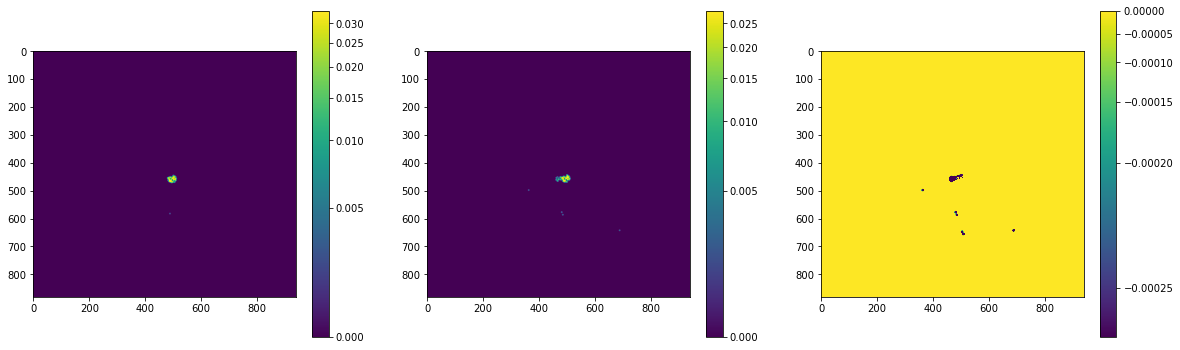

In [41]:
pl.figure(figsize=(20,6))
pl.subplot(1,3,1)
nsc = SpectralCube.read('G327.29_B6_spw0_12M_spw0_testchannel_noselfcal_clean.model', format='casa_image')[:,100:-100,250:-250][0]
vis.imshow_norm(nsc.value, stretch=vis.AsinhStretch(), interval=vis.AsymmetricPercentileInterval(0.1, 99.99))
pl.colorbar()

pl.subplot(1,3,2)
sc = SpectralCube.read('G327.29_B6_spw0_12M_spw0_testchannel_selfcal_clean.model', format='casa_image')[:,100:-100,250:-250][0]
vis.imshow_norm(sc.value, stretch=vis.AsinhStretch(), interval=vis.AsymmetricPercentileInterval(0.1, 99.99))
pl.colorbar()

pl.subplot(1,3,3)
vis.imshow_norm((nsc-sc).value, stretch=vis.AsinhStretch(), interval=vis.AsymmetricPercentileInterval(0.1, 99.9))
pl.colorbar()

In [167]:
import regions

ModuleNotFoundError: No module named 'regions'

In [ ]:
pl.figure(figsize=(12,12))
sc = SpectralCube.read('G327.29_B6_spw0_12M_spw0_testchannel_selfcal_clean.image', format='casa_image')[:,100:-100,250:-250][0]
#cleanbox = regions.CircleSkyRegion(
pl.subplot(projection=sc.wcs)
pl.imshow(sc.value)
pl.colorbar()

from casatools import image

ia = image()

ia.open('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/G327.29_B6_spw0_12M_spw0.image')
hist = ia.history()
ia.close()

kwargs = {x.split(":")[0].strip(): x.split(":")[1].strip() for x in hist if ':' in x}
kwargs

from casatools import calibrater

cb = calibrater()

cb.open(vis)
cb.setapply(type='P', table=caltables[0], spwmap=[]

In [43]:
import casatools
tb = casatools.table()
msmd = casatools.msmetadata()
ms = casatools.ms()

In [58]:
tb.open(caltables[0])
data = {col: tb.getcol(col) for col in tb.colnames() if col not in ("WEIGHT",)}
data['ANGLE'] = np.angle(data['CPARAM'])
tb.close()
okfields,notokfields = goodenough_field_solutions(caltables[0], minsnr=5)
print(okfields, notokfields)
fieldOKmask = np.isin(data['FIELD_ID'], okfields)
spwids = np.unique(data['SPECTRAL_WINDOW_ID'])
oids = np.unique(data['OBSERVATION_ID'])
spw16 = data['SPECTRAL_WINDOW_ID'] == 16

[0, 23, 27, 28, 29, 32, 33, 34, 37, 38, 39, 43, 44] [15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 30, 31, 35, 36, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52]


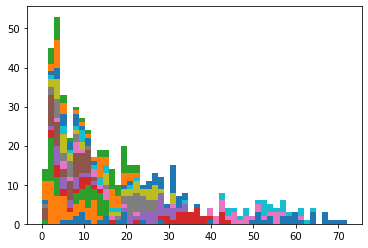

In [65]:
OK = data['SNR'] != 0

toplot = [data['SNR'][0,0, (data['FIELD_ID'] == fid) & (OK[0,0,:]) & (data['SPECTRAL_WINDOW_ID'] == 16)]
          for fid in okfields]

H,L,P = pl.hist(toplot, bins=50, stacked=True)

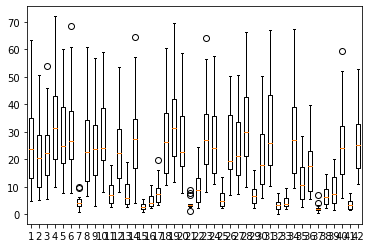

In [60]:
OK = data['SNR'] != 0

toplot = [data['SNR'][0,0, fieldOKmask & (OK[0,0,:]) & (data['ANTENNA1'] == ant) & spw16]
          for ant in np.unique(data['ANTENNA1'])]
toplot = [x for x in toplot if len(x) > 0]

_ = pl.boxplot(toplot)

In [62]:
fids_12m = np.unique(data['FIELD_ID'][spw16])
print(fids_12m)

[ 0 15 16 17 18 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52]


In [64]:
for fid in okfields:
    dat = data['SNR'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
    ang = data['ANGLE'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
    print(f"fid={fid:03d} mean={dat.mean():10.2f} median={np.median(dat):10.2f} std={dat.std():10.2f} angle_rms={ang.std():10.2f}")

fid=000 mean=     67.52 median=     65.29 std=     42.84 angle_rms=      0.26
fid=023 mean=     10.23 median=      8.14 std=      8.53 angle_rms=      0.48
fid=027 mean=     21.91 median=     14.63 std=     20.08 angle_rms=      0.39
fid=028 mean=     54.11 median=     45.22 std=     38.83 angle_rms=      0.36
fid=029 mean=     40.30 median=     33.05 std=     30.14 angle_rms=      0.29
fid=032 mean=     15.74 median=     10.62 std=     14.90 angle_rms=      0.36
fid=033 mean=     65.78 median=     56.57 std=     45.88 angle_rms=      0.39
fid=034 mean=     25.83 median=     24.49 std=     17.13 angle_rms=      0.29
fid=037 mean=     36.94 median=     27.51 std=     30.35 angle_rms=      0.30
fid=038 mean=     65.00 median=     59.84 std=     43.29 angle_rms=      0.36
fid=039 mean=     33.20 median=     32.55 std=     21.48 angle_rms=      0.31
fid=043 mean=     21.70 median=     17.07 std=     18.60 angle_rms=      0.31
fid=044 mean=     22.89 median=     19.59 std=     16.70 angle_r

In [77]:
msmd.open('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_selfcal.ms')
antobs = {}
for oid in np.unique(data['OBSERVATION_ID']):
    antids = np.unique(data['ANTENNA1'][(data['OBSERVATION_ID']==oid) & (OK[0,0,:])])
    antnames = {k:v for k,v in zip(antids, msmd.antennanames(antids))}

    center = (np.mean([msmd.antennaoffset(k)['latitude offset']['value'] for k in antnames]),
              np.mean([msmd.antennaoffset(k)['longitude offset']['value'] for k in antnames]),)
    print(oid, center)
    
    antdist = {k:((msmd.antennaoffset(k)['latitude offset']['value']-center[0])**2 + (msmd.antennaoffset(k)['longitude offset']['value']-center[1])**2)**0.5
               for k in antnames}
    antloc = {k:(msmd.antennaoffset(k)['latitude offset']['value'], msmd.antennaoffset(k)['longitude offset']['value'])
               for k in antnames}

    antobs[oid] = {'antnames': antnames,
                   'antdist': antdist,
                   'antloc': antloc}
msmd.close()
antdist = {(ant,oid): antobs[oid]['antdist'][ant] for oid in antobs for ant in antobs[oid]['antnames']}
antnames = {(ant,oid): antobs[oid]['antnames'][ant] for oid in antobs for ant in antobs[oid]['antnames']}

2 (-706.7941526650126, 19.541356371363438)
3 (-676.8107666657207, 20.41401863208003)


In [84]:
antstats = {}
for oid in np.unique(data['OBSERVATION_ID']):
    for antid in np.unique(data['ANTENNA1']):
        msk = (data['ANTENNA1'] == antid) & (OK[0,0,:]) & fieldOKmask & (data['OBSERVATION_ID'] == oid)
        if np.any(msk) and (antid, oid) in antnames:
            dat = data['SNR'][1,0, msk]
            ang = data['ANGLE'][1,0, msk]*180/np.pi
            print(f"antenna={antnames[(antid,oid)]} oid={oid} dist={antdist[(antid,oid)]:6.1f} "
                  f"mean={dat.mean():10.2f} median={np.median(dat):10.2f} "
                  f"std={dat.std():10.2f}  angle_rms={ang.std():10.2f}")
            antstats[(antid,oid)] = {'mean':dat.mean(),
                                     'median':np.median(dat),
                                     'std': dat.std(),
                                     'angle_rms': ang.std(),
                                     'angle_mean': ang.mean(),
                                     'angle_median': np.median(ang),
                                   }

antenna=DA41 oid=2 dist=  62.2 mean=     39.13 median=     31.43 std=     29.63  angle_rms=      5.66
antenna=DA43 oid=2 dist= 120.4 mean=     31.51 median=     25.68 std=     23.64  angle_rms=     11.03
antenna=DA44 oid=2 dist=  94.0 mean=     31.26 median=     24.83 std=     23.28  angle_rms=     10.14
antenna=DA45 oid=2 dist=  30.7 mean=     47.42 median=     36.75 std=     35.63  angle_rms=      9.71
antenna=DA46 oid=2 dist=  26.8 mean=     40.06 median=     31.50 std=     28.05  angle_rms=     19.33
antenna=DA47 oid=2 dist=  12.5 mean=     44.00 median=     34.55 std=     31.80  angle_rms=     13.31
antenna=DA48 oid=2 dist= 272.7 mean=      6.65 median=      5.57 std=      4.50  angle_rms=     28.96
antenna=DA49 oid=2 dist=  54.9 mean=     37.38 median=     30.99 std=     27.83  angle_rms=      8.72
antenna=DA50 oid=2 dist=  74.7 mean=     32.76 median=     26.53 std=     24.21  angle_rms=     17.81
antenna=DA51 oid=2 dist=  51.8 mean=     38.20 median=     30.41 std=     26.01  a

Text(0, 0.5, 'Gaincal SNR')

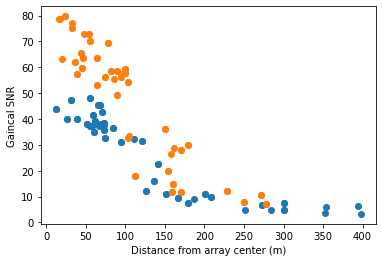

In [85]:
uoids = np.unique(data['OBSERVATION_ID'])
for oid in uoids:
    pl.plot([antdist[(ant,oid)] for ant,_ in antstats  if (ant,oid) in antstats],
            [antstats[(ant,oid)]['mean'] for ant,_ in antstats  if (ant,oid) in antstats],
            'o')
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal SNR")

Text(0, 0.5, 'Gaincal mean angle correction')

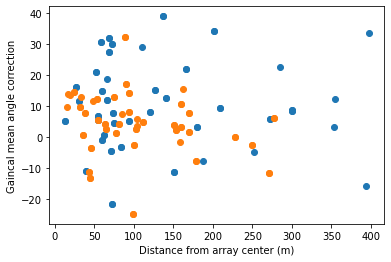

In [86]:
uoids = np.unique(data['OBSERVATION_ID'])
for oid in uoids:
    pl.plot([antdist[(ant,oid)] for ant,_ in antstats  if (ant,oid) in antstats],
            [antstats[(ant,oid)]['angle_mean'] for ant,_ in antstats  if (ant,oid) in antstats],
            'o')
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal mean angle correction")

In [87]:
ls -d /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/G327.29_B6*ms

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_selfcal.ms/
/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/G327.29_B6_uid___A001_X1296_X175_continuum_merged_bsens_12M_selfcal_bsens.ms/


## We may need to re-populate the model column

This would use the last good image

```
/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_robust0_selfcal5_finaliter.image.tt0
/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/G327.29_B6_uid___A001_X1296_X175_continuum_merged_bsens_12M_noco_robust0_selfcal5_finaliter.image.tt0
/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/G327.29_B6_uid___A001_X1296_X175_continuum_merged_bsens_12M_robust0_selfcal5_finaliter.image.tt0
```

In [126]:
%run /orange/adamginsburg/ALMA_IMF/reduction/reduction/metadata_tools.py

In [127]:
import string

In [119]:
def tryint(x):
    try:
        if float(x) == int(x):
            return int(x)
    except ValueError:
        try:
            return float(x)
        except ValueError:
            return x
    except ValueError:
        return x

In [120]:
ia.open('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_robust0_selfcal5_finaliter.image.tt0')
hist = ia.history()
ia.close()
dd = {h.split(":")[0]: h.split(":")[1].lstrip() for h in hist if len(h.split(":")) == 2}
tclean_pars = {x: y for x, y in dd.items() if x[0] not in string.digits and 'git' not in x and 'selfcal' not in x}
tclean_pars = {x: eval(y) if '[' in y else tryint(y) for x,y in tclean_pars.items()}
tclean_pars

{'niter': 20000,
 'pbmask': 0.1,
 'deconvolver': 'mtmfs',
 'scales': [0, 3, 9, 27],
 'pblimit': 0.1,
 'cell': ['0.11arcsec', '0.11arcsec'],
 'weighting': 'briggs',
 'specmode': 'mfs',
 'nterms': 2,
 'threshold': '0.5mJy',
 'robust': 0,
 'usemask': 'user',
 'gridder': 'mosaic',
 'imsize': [1512, 1120]}

In [132]:
shutil.copytree('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_selfcal.ms', 'test_b6_selfcal.ms')

'test_b6_selfcal.ms'

In [133]:
populate_model_column(imname='/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_robust0_selfcal5_finaliter',
                      selfcal_ms='test_b6_selfcal.ms',
                      field='G327.29',
                      impars_thisiter=tclean_pars,
                      phasecenter='',
                      maskname='',
                      antennae='')

(dirty) Imaging parameters are: {'niter': 0, 'pbmask': 0.1, 'deconvolver': 'mtmfs', 'scales': [0, 3, 9, 27], 'pblimit': 0.1, 'cell': ['0.11arcsec', '0.11arcsec'], 'weighting': 'briggs', 'specmode': 'mfs', 'nterms': 2, 'threshold': '0.5mJy', 'robust': 0, 'usemask': 'user', 'gridder': 'mosaic', 'imsize': [1512, 1120]}
This tclean run with zero iterations is only being done to populate the model column from image /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_robust0_selfcal5_finaliter.


In [134]:
from casatasks import gaincal

In [135]:
shutil.rmtree('/blue/adamginsburg/adamginsburg/almaimf/workdir/G327.29_B6_recal_test.cal')
gaincal(vis='test_b6_selfcal.ms',
        caltable='/blue/adamginsburg/adamginsburg/almaimf/workdir/G327.29_B6_recal_test.cal',
        solint='inf',
        calmode='p',
        gaintype='T')

gaincal(vis='/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/G327.29_B6_uid___A001_X1296_X175_continuum_merged_bsens_12M_selfcal_bsens.ms',
        caltable='/blue/adamginsburg/adamginsburg/almaimf/workdir/G327.29_B6_recal_test_bsens.cal',
        solint='inf',
        calmode='p',
        gaintype='T')

In [162]:
okfields

[0,
 22,
 23,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 51,
 52]

In [163]:
CT = '/blue/adamginsburg/adamginsburg/almaimf/workdir/G327.29_B6_recal_test.cal'
VV = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/G327.29_B6_uid___A001_X1296_X175_continuum_merged_12M_selfcal.ms'
#CT = '/blue/adamginsburg/adamginsburg/almaimf/workdir/G327.29_B6_recal_test_bsens.cal'
#VV = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/G327.29_B6_uid___A001_X1296_X175_continuum_merged_bsens_12M_selfcal_bsens.ms'

tb.open(CT)
data = {col: tb.getcol(col) for col in tb.colnames() if col not in ("WEIGHT",)}
data['ANGLE'] = np.angle(data['CPARAM'])
tb.close()
okfields,notokfields = goodenough_field_solutions(CT, minsnr=10)
print(okfields, notokfields)
fieldOKmask = np.isin(data['FIELD_ID'], okfields)
spwids = np.unique(data['SPECTRAL_WINDOW_ID'])
oids = np.unique(data['OBSERVATION_ID'])
spw16 = data['SPECTRAL_WINDOW_ID'] == 16


msmd.open(VV)
antobs = {}
for oid in np.unique(data['OBSERVATION_ID']):
    antids = np.unique(data['ANTENNA1'][(data['OBSERVATION_ID']==oid) & (OK[0,0,:])])
    antnames = {k:v for k,v in zip(antids, msmd.antennanames(antids))}

    center = (np.mean([msmd.antennaoffset(k)['latitude offset']['value'] for k in antnames]),
              np.mean([msmd.antennaoffset(k)['longitude offset']['value'] for k in antnames]),)
    print(oid, center)
    
    antdist = {k:((msmd.antennaoffset(k)['latitude offset']['value']-center[0])**2 + (msmd.antennaoffset(k)['longitude offset']['value']-center[1])**2)**0.5
               for k in antnames}
    antloc = {k:(msmd.antennaoffset(k)['latitude offset']['value'], msmd.antennaoffset(k)['longitude offset']['value'])
               for k in antnames}

    antobs[oid] = {'antnames': antnames,
                   'antdist': antdist,
                   'antloc': antloc}
msmd.close()
antdist = {(ant,oid): antobs[oid]['antdist'][ant] for oid in antobs for ant in antobs[oid]['antnames']}
antnames = {(ant,oid): antobs[oid]['antnames'][ant] for oid in antobs for ant in antobs[oid]['antnames']}


antstats = {}
for spwid in spwids:
    for oid in np.unique(data['OBSERVATION_ID']):
        for antid in np.unique(data['ANTENNA1']):
            msk = (data['ANTENNA1'] == antid) & (OK[0,0,:]) & fieldOKmask & (data['OBSERVATION_ID'] == oid) & (data['SPECTRAL_WINDOW_ID'] == spwid)
            if np.any(msk) and (antid, oid) in antnames:
                dat = data['SNR'][:,0, msk]
                ang = data['ANGLE'][:,0, msk]*180/np.pi
                #print(f"antenna={antnames[(antid,oid)]} oid={oid} spwid={spwid} dist={antdist[(antid,oid)]:6.1f} "
                #      f"mean={dat.mean():10.2f} median={np.median(dat):10.2f} "
                #      f"std={dat.std():10.2f}  angle_rms={ang.std():10.2f}")
                antstats[(antid,oid,spwid)] = {'mean':dat.mean(),
                                         'median':np.median(dat),
                                         'std': dat.std(),
                                         'angle_rms': ang.std(),
                                         'angle_mean': ang.mean(),
                                         'angle_median': np.median(ang),
                                       }

[0, 27, 28, 29, 32, 33, 34, 37, 38, 39, 40, 43, 44, 45, 46] [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 35, 36, 41, 42, 47, 48, 49, 50, 51, 52]
2 (-706.7941526650126, 19.541356371363438)
3 (-676.8107666657207, 20.41401863208003)


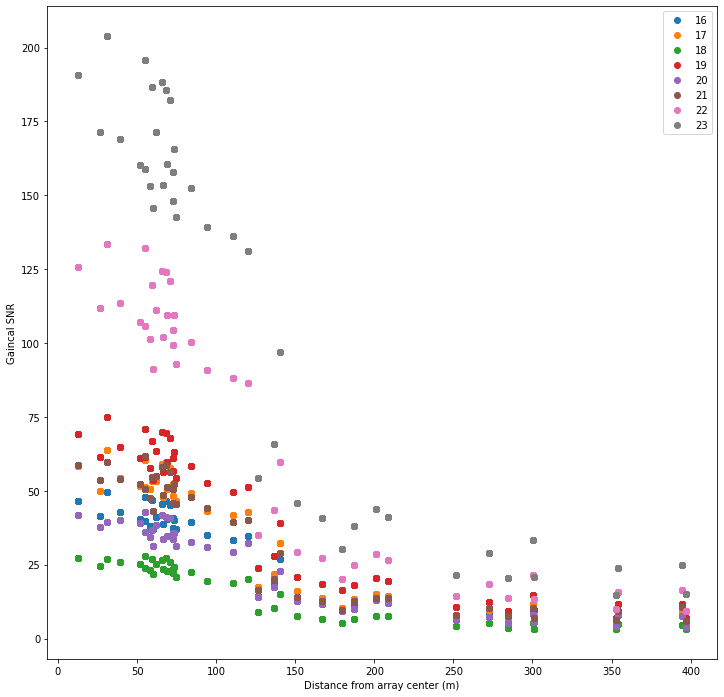

In [164]:
pl.figure(figsize=(12,12))
uoids = np.unique(data['OBSERVATION_ID'])
for spwid in spwids[:8]:
    for oid,shape in zip(uoids, 'osd^'):
        y = [antstats[(ant,oid,spwid)]['mean'] for ant,_,_ in antstats  if (ant,oid,spwid) in antstats]
        if len(y) > 0:
            pl.plot([antdist[(ant,oid)] for ant,_,_ in antstats  if (ant,oid,spwid) in antstats],
                    y,
                    marker=shape, linestyle='none', label=str(spwid))
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal SNR")
pl.legend(loc='best')

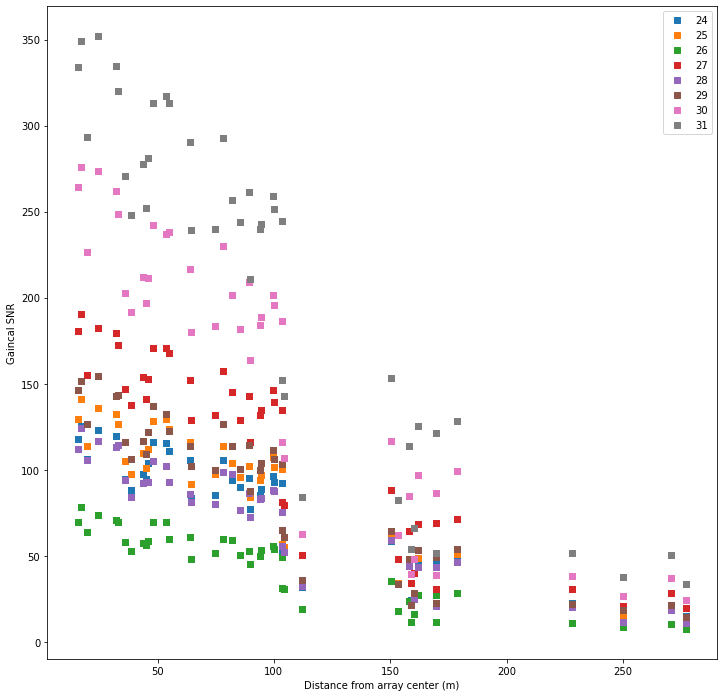

In [165]:
pl.figure(figsize=(12,12))
uoids = np.unique(data['OBSERVATION_ID'])
for spwid in spwids[8:]:
    for oid,shape in zip(uoids, 'osd^'):
        y = [antstats[(ant,oid,spwid)]['mean'] for ant,_,_ in antstats  if (ant,oid,spwid) in antstats]
        if len(y) > 0:
            pl.plot([antdist[(ant,oid)] for ant,_,_ in antstats  if (ant,oid,spwid) in antstats],
                    y,
                    marker=shape, linestyle='none', label=str(spwid))
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal SNR")
pl.legend(loc='best')

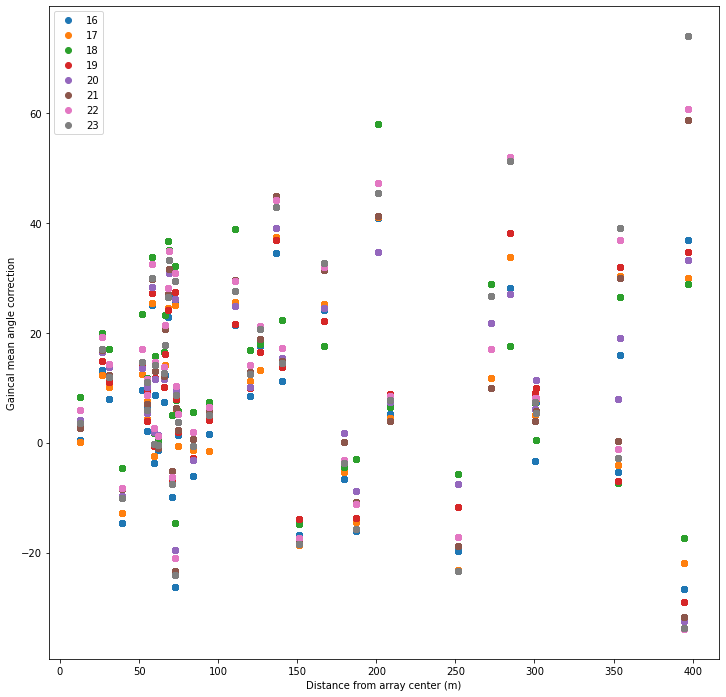

In [166]:
pl.figure(figsize=(12,12))
uoids = np.unique(data['OBSERVATION_ID'])
for spwid in spwids[:8]:
    for oid,shape in zip(uoids, 'osd^'):
        y = [antstats[(ant,oid,spwid)]['angle_mean'] for ant,_,_ in antstats  if (ant,oid,spwid) in antstats]
        if len(y) > 0:
            pl.plot([antdist[(ant,oid)] for ant,_,_ in antstats  if (ant,oid,spwid) in antstats],
                    y,
                    marker=shape, linestyle='none', label=str(spwid))
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal mean angle correction")
pl.legend(loc='best')